In [107]:
#install.packages('package-name',repos='http://cran.us.r-project.org')
#https://cs.hse.ru/data/2015/05/14/1098547089/4._Centrality_Metrics.pdf
library(igraph)
el=read.csv('test.edgelist',header=FALSE,sep=' ')   #file.choose()) # read the 'el.with.weights.csv' file 
g=graph.data.frame(el)
E(g)$weight<-E(g)$V3


In [108]:
EigenCentrality = eigen_centrality(g, directed=TRUE, weights=E(g)$weight)$vector
EigenCentrality = EigenCentrality/max(EigenCentrality)



Warning message in .Call("R_igraph_eigenvector_centrality", graph, directed, scale, :
“At centrality.c:362 :Weighted directed graph in eigenvector centrality”

In [109]:

PageRank= page_rank(g, algo = c('prpack', 'arpack', 'power'), vids = V(g),
     directed = TRUE, damping = 0.85, personalized = NULL, weights = NULL,
     options = NULL)$vector
PageRank=PageRank/max(PageRank)


In [110]:
Betweenness=betweenness(g, directed=TRUE)
Betweenness = Betweenness/max(Betweenness)


In [111]:
Hubs = hub_score(g)$vector


In [112]:
Authorities=authority_score(g, weights=NA)$vector


In [113]:
Closeness = closeness(g, vids = V(g), mode = c( "all"),
  weights = NULL, normalized = FALSE)

In [114]:
Flux = strength(g,vids=V(g),mode=c("all"))
Flux = Flux/max(Flux)

FluxIn = strength(g,vids=V(g),mode=c("in"))
FluxIn = FluxIn/max(FluxIn)

FluxOut = strength(g,vids=V(g),mode=c("out"))
FluxOut = FluxOut/max(FluxOut)


In [115]:
library(Hmisc)
library(ggplot2)
require(reshape2)

df = data.frame(Flux,FluxIn,FluxOut,Closeness,EigenCentrality,PageRank,Betweenness,Authorities,Hubs)

df1 <- melt(df ,  id.vars = 'Flux', variable.name = 'series')
df1$Value = df1$value

df

,Flux,FluxIn,FluxOut,Closeness,EigenCentrality,PageRank,Betweenness,Authorities,Hubs
CH3NO3,1.392704e-04,3.565865e-04,3.825656e-06,9.709534e-07,0.0000298989,0.03606675,0.2567568,1.017328e-01,3.593448e-10
C2H5O2,2.776453e-02,3.964358e-02,2.036078e-02,9.702916e-07,0.0000000000,0.09096343,0.9594595,5.645765e-02,0.000000e+00
CH3OH,1.586176e-03,2.801817e-03,8.285140e-04,9.032640e-07,0.0002349254,0.04120222,0.0000000,1.017328e-01,7.782253e-08
PAN,7.416579e-01,9.645006e-01,6.027687e-01,6.486455e-07,1.0000000000,0.30098224,0.0000000,2.796285e-02,3.283264e-06
IPROPOL,1.466930e-06,2.116396e-06,1.062144e-06,9.503258e-07,0.0000000000,0.03532336,0.2702703,0.000000e+00,1.775666e-18
C2H5CO3,1.195733e-02,1.425265e-02,1.052674e-02,9.655545e-07,0.0000000000,0.20753162,0.2702703,5.128167e-02,0.000000e+00
CH3O2,2.710152e-01,3.011256e-01,2.522486e-01,9.646988e-07,0.0802397953,1.00000000,0.9864865,3.028286e-01,1.847788e-07
C2H5OH,2.417095e-05,3.492085e-05,1.747095e-05,9.713386e-07,0.0000000000,0.03540050,1.0000000,3.219682e-17,0.000000e+00
HCHO,8.218409e-02,6.855369e-02,9.067940e-02,9.712910e-07,0.0096618866,0.25371691,0.2027027,1.000000e+00,4.289141e-09
C3H8,1.133793e-02,0.000000e+00,1.840443e-02,3.603860e-07,0.0000000000,0.03531785,0.0000000,0.000000e+00,8.878332e-19


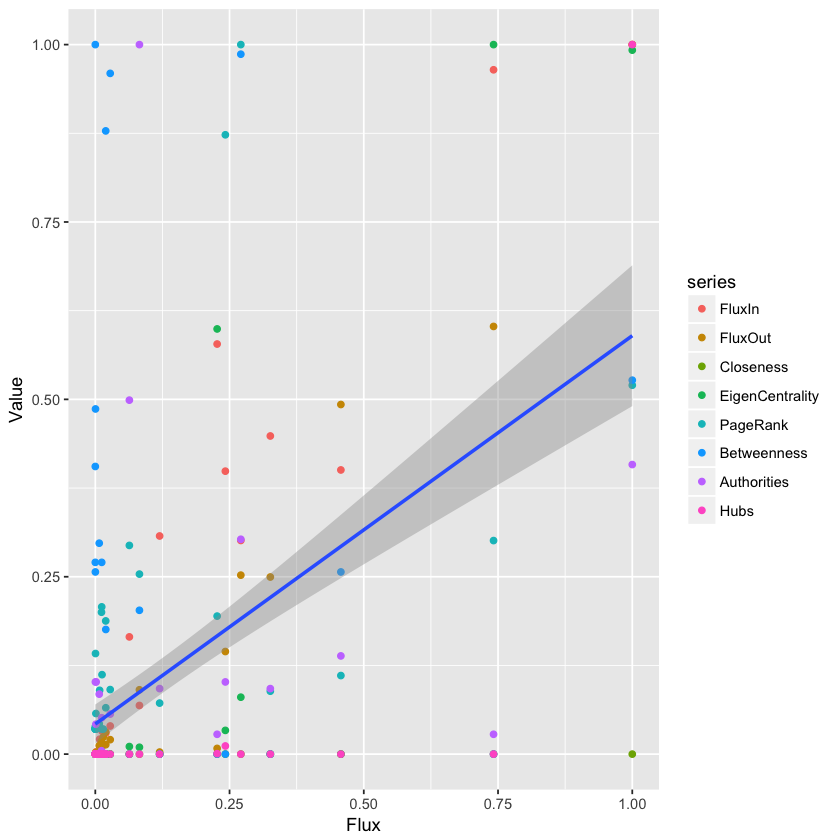

In [116]:
ggplot(df1, aes(Flux,Value)) + geom_point(aes(colour = series))+
geom_smooth(method='lm')



In [117]:
write.csv(df, file = "centrality.csv")

In [118]:
edge_density(g, loops = FALSE)

[1] 0.05745968